<a href="https://colab.research.google.com/github/RabiaBabar/Deep-Learning---Computer-Vision/blob/Assignment-2---AI-%26-Computer-Vision/Rabia_Assignment2_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Set the current working directory
current_dir = "/content"
print(f"Current Directory: {current_dir}")

Current Directory: /content


In [ ]:
# List the contents of your dataset directory
dataset_path = "/content/drive/My Drive/data_assign_2/hand_written_digits"
print(f"Contents of Dataset Directory:")
!ls "$dataset_path"

Contents of Dataset Directory:
0_digits  1_digits  2_digits


In [ ]:
# Change the working directory to the dataset path
%cd "$dataset_path"

/content/drive/My Drive/data_assign_2/hand_written_digits


In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [ ]:
# Define the path to the main dataset directory
data_dir = "/content/drive/My Drive/data_assign_2/hand_written_digits"

# Set parameters for data loading
batch_size = 32
img_height = 150
img_width = 150

# Load the training dataset
train_ds = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    labels='inferred',
    label_mode='int',
    color_mode="grayscale",
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Load the validation dataset
val_ds = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    labels='inferred',
    label_mode='int',
    color_mode="grayscale",
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 4668 files belonging to 3 classes.
Using 3735 files for training.
Found 4668 files belonging to 3 classes.
Using 933 files for validation.


In [ ]:
# Print out the class names
class_names = train_ds.class_names
print(f"Class Names: {class_names}")

# Configure the dataset for performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Calculate the total size of the training dataset
train_size = tf.data.experimental.cardinality(train_ds).numpy()
print(f'Total number of batches in the training set: {train_size}')
print(f'Total number of images in the training set: {train_size * batch_size}')

# Calculate the total size of the validation dataset
val_size = tf.data.experimental.cardinality(val_ds).numpy()
print(f'Total number of batches in the validation set: {val_size}')
print(f'Total number of images in the validation set: {val_size * batch_size}')

Class Names: ['0_digits', '1_digits', '2_digits']
Total number of batches in the training set: 117
Total number of images in the training set: 3744
Total number of batches in the validation set: 30
Total number of images in the validation set: 960



Train Dataset:
Images shape: (32, 150, 150, 1)
Images dtype: <dtype: 'float32'>
Labels shape: (32,)
Labels dtype: <dtype: 'int32'>

Validation Dataset:
Images shape: (32, 150, 150, 1)
Images dtype: <dtype: 'float32'>
Labels shape: (32,)
Labels dtype: <dtype: 'int32'>


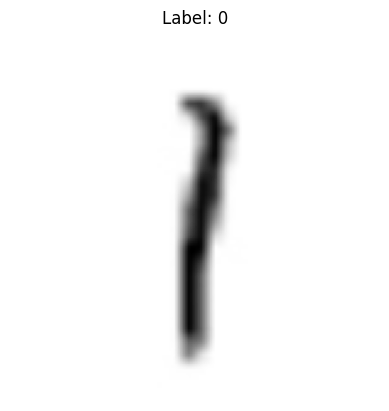

In [ ]:
# Inspect one batch of the train dataset
for images, labels in train_ds.take(1):
    print("\nTrain Dataset:")
    print(f"Images shape: {images.shape}")
    print(f"Images dtype: {images.dtype}")
    print(f"Labels shape: {labels.shape}")
    print(f"Labels dtype: {labels.dtype}")

# Inspect one batch of the validation dataset
for images, labels in val_ds.take(1):
    print("\nValidation Dataset:")
    print(f"Images shape: {images.shape}")
    print(f"Images dtype: {images.dtype}")
    print(f"Labels shape: {labels.shape}")
    print(f"Labels dtype: {labels.dtype}")

# Visualize an example image from the training dataset
for images, labels in train_ds.take(1):
    first_image = images[0].numpy().astype('uint8')
    first_label = labels[0].numpy()

    plt.imshow(first_image[:, :, 0], cmap='gray')
    plt.title(f'Label: {np.argmax(first_label)}')
    plt.axis('off')
    plt.show()

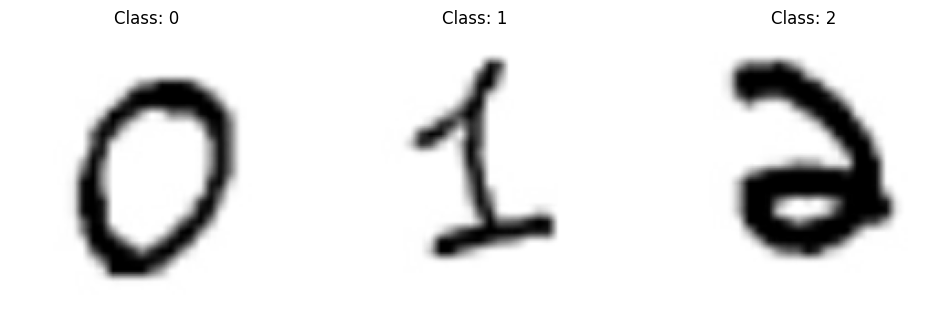

In [ ]:

# Visualize example images from each class
example_images = {}
for images, labels in train_ds:
    class_indices = labels.numpy()
    for img, class_idx in zip(images, class_indices):
        if class_idx not in example_images:
            example_images[class_idx] = img.numpy().astype('uint8')
        if len(example_images) == 3:  # Assuming 3 classes: 0, 1, 2
            break
    if len(example_images) == 3:
        break

plt.figure(figsize=(12, 4))
for class_idx, img in example_images.items():
    plt.subplot(1, 3, class_idx+1)
    plt.imshow(img[:, :, 0], cmap='gray')
    plt.title(f'Class: {class_idx}')
    plt.axis('off')
plt.show()




In [ ]:
# Data augmentation
data_augmentation = Sequential([
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),
])
# Define the model
model = Sequential([
    data_augmentation,
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(img_height, img_width, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)


Epoch 1/10
117/117 [==============================] - 170s 1s/step - loss: 0.9971 - accuracy: 0.9194 - val_loss: 24.2947 - val_accuracy: 0.6259
Epoch 2/10
117/117 [==============================] - 164s 1s/step - loss: 0.1879 - accuracy: 0.9596 - val_loss: 0.3818 - val_accuracy: 0.9582
Epoch 3/10
117/117 [==============================] - 174s 1s/step - loss: 0.1644 - accuracy: 0.9644 - val_loss: 1.2519 - val_accuracy: 0.8885
Epoch 4/10
117/117 [==============================] - 163s 1s/step - loss: 0.1248 - accuracy: 0.9708 - val_loss: 0.1839 - val_accuracy: 0.9796
Epoch 5/10
117/117 [==============================] - 169s 1s/step - loss: 0.1478 - accuracy: 0.9716 - val_loss: 0.2375 - val_accuracy: 0.9753
Epoch 6/10
117/117 [==============================] - 174s 1s/step - loss: 0.1187 - accuracy: 0.9730 - val_loss: 59.5388 - val_accuracy: 0.6292
Epoch 7/10
117/117 [==============================] - 161s 1s/step - loss: 0.0817 - accuracy: 0.9767 - val_loss: 69.2186 - val_accuracy: 0.5

In [44]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(val_ds)

# Print the results
print(f'Validation accuracy: {val_accuracy*100:.2f}%')

30/30 [==============================] - 11s 345ms/step - loss: 1.8564 - accuracy: 0.9089
Validation accuracy: 90.89%


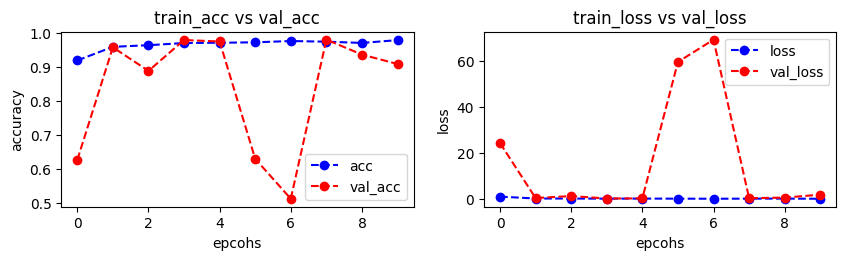

In [45]:
fig = plt.figure(figsize=(10,5))

#plot accuracy
plt.subplot(221)
plt.plot(history.history['accuracy'], 'bo--',label = "acc")
plt.plot(history.history['val_accuracy'], 'ro--',label = "val_acc")
plt.title("train_acc vs val_acc")
plt.ylabel("accuracy")
plt.xlabel("epcohs")
plt.legend()

#plot loss funtion
plt.subplot(222)
plt.plot(history.history['loss'], 'bo--',label = "loss")
plt.plot(history.history['val_loss'], 'ro--',label = "val_loss")
plt.title("train_loss vs val_loss")
plt.ylabel("loss")
plt.xlabel("epcohs")
plt.legend()

plt.show()